# TP : modification d'images avec la bibliothèque PIL

Nous allons faire quelques modifications d'une image très célèbre : celle de la Joconde.

Cette image est disponible dans le même répertoire que ce TP et s'appelle "joconde.png".
Vous pouvez l'ouvrir et l'afficher avec le code suivant :

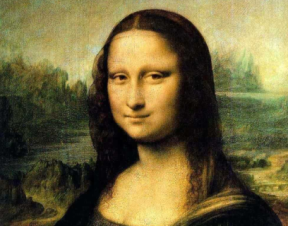

In [35]:
from PIL import Image
# chargement de l ’image
img=Image.open("joconde.png" )

# affichage de l'image
img.show()

## Taille de l'image

On peut récupérer les dimensions de l'image grâce au code suivant :

In [24]:
# Récupération des dimensions de l'image
largeur,hauteur=img.size
print(largeur,hauteur)

288 226


Combien cette image a-t-elle de pixels ?

In [25]:
print(largeur*hauteur)

65088


## Première modification

Quelle modification permet le code suivant ?

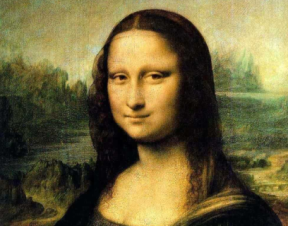

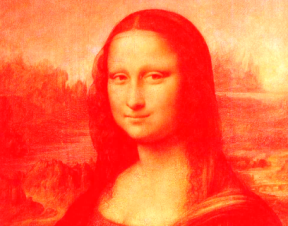

In [26]:
#création d'une image vide
img2=Image.new('RGB',(largeur,hauteur))

#traitement
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        r2 = 255
        v2 = v1
        b2 = b1
        img2.putpixel((x,y),(r2,v2,b2))

# affichage
img.show()
img2.show()

## Du rouge au bleu

Copier-coller et modifier le code précédent pour accentuer maintenant la dominante bleue de la Joconde

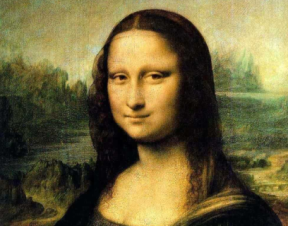

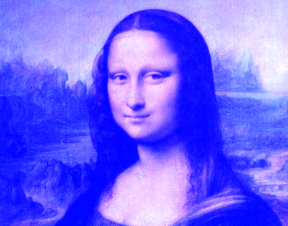

In [27]:
#création d'une image vide
#img2=Image.new('RGB',(largeur,hauteur))

#traitement
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        r2 = r1
        v2 = v1
        b2 = 255
        img2.putpixel((x,y),(r2,v2,b2))

# affichage
img.show()
img2.show()

## Transformer la Joconde en noir et blanc

Toutes les nuances de gris s’obtiennent par des couleurs de la forme (g,g,g) c’est à dire que les composantes rouge, verte et bleue ont la même valeur : du blanc (255, 255, 255) jusqu’au noir (0, 0, 0).

Pour mettre une image en niveau de gris, une technique simple consiste à remplacer les trois composantes (r, v, b) de chaque pixels par la moyenne des trois composantes.

### Attention :
Les valeurs des composantes R,V,B doivent être des entiers. Comparer :

In [39]:
(10+50+35)/3

31.666666666666668

et :

In [37]:
(10+50+35)//3

31

Modifiez le programme précédent pour qu’il affiche la Joconde en niveau de gris.

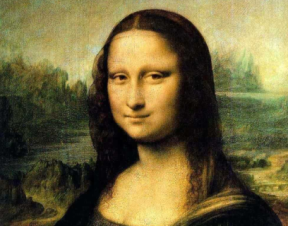

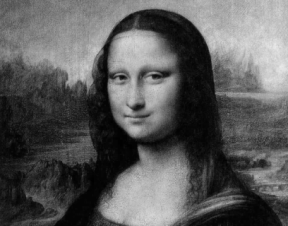

In [38]:
#création d'une image vide
img2=Image.new('RGB',(largeur,hauteur))

#traitement pour passage en niveau de gris
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        g=(r1+v1+b1)//3
        img2.putpixel((x,y),(g,g,g))

# affichage
img.show()
img2.show()

## Création d'un négatif

Modifier le programme précédent pour obtenir un négatif de l'image : le noir devient blanc, et le blanc devient noir

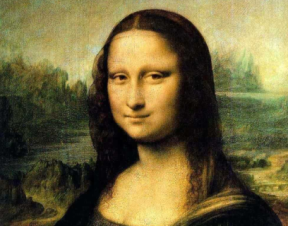

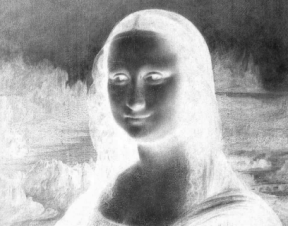

In [30]:
#création d'une image vide
img2=Image.new('RGB',(largeur,hauteur))

#traitement pour passage en niveau de gris
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        g=255-(r1+v1+b1)//3
        img2.putpixel((x,y),(g,g,g))

# affichage
img.show()
img2.show()

## Saturation de l'image
Pour mettre une image en noir et blanc en accentuant les contrastes, il faut partir d’une image en niveau de gris, puis si la valeur calculée est supérieure à un certain seuil (par exemple 127) alors on la met en blanc (255) sinon on la met en noir (0).

Modifier le programme pour obtenir cet effet.

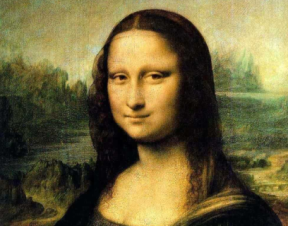

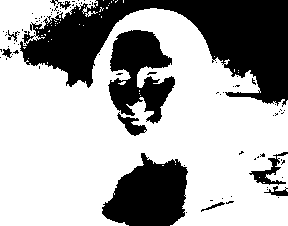

In [31]:
#création d'une image vide
img2=Image.new('RGB',(largeur,hauteur))

#traitement pour passage en niveau de gris
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        g=255-(r1+v1+b1)//3
        if g>127 :
            g=255
        else : 
            g=0
        img2.putpixel((x,y),(g,g,g))

# affichage
img.show()
img2.show()

## Eclairer l'image
On retravaille maintenant l'image en couleur.
Réalisez maintenant un programme qui augmente la luminosité de chaque pixel de 100 c’est à dire :
(r, v, b)->(100 + r, 100 + v, 100 + b).
Attention, les valeurs n’ont pas le droit de dépasser 255. Il faudra donc tester les valeurs et remplacer celles qui dépassent 255 par 255.

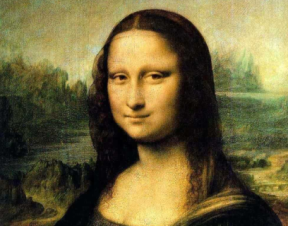

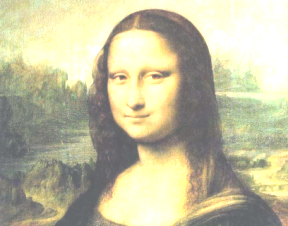

In [32]:
#traitement
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        r2 = min(r1+100,255)
        v2 = min(v1+100,255)
        b2 = min(b1+100,255)
        img2.putpixel((x,y),(r2,v2,b2))

# affichage
img.show()
img2.show()

## Assombrir l'image
Pouvez-vous assombrir l'image ?

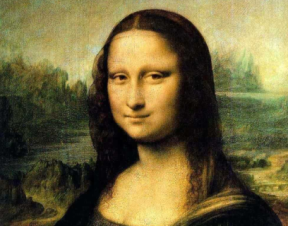

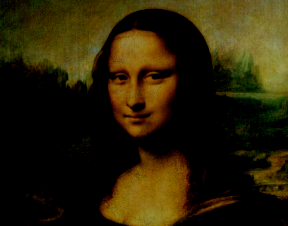

In [40]:
#traitement
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        r2 = max(r1-100,0)
        v2 = max(v1-100,0)
        b2 = max(b1-100,0)
        img2.putpixel((x,y),(r2,v2,b2))

# affichage
img.show()
img2.show()

## Modification de la luminosité définie par l'utilisateur
On souhaite maintenant que l'utilsateur saisisse une valeur positive pour éclaircir, et une valeur négative pour assombrir.

On crée donc une variable valeur qui contient ce que saisit l'utilisateur :

In [42]:
# demande utilisateur
valeur=int(input("De combien voulez-vous augmenter la luminosité ?"))

De combien voulez-vous augmenter la luminosité ?30


Modifier alors le programme précédent pour qu'il éclaircisse ou assombrisse suivant la valeur saisie par l'utilisateur :

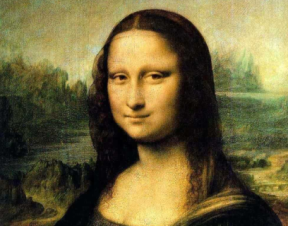

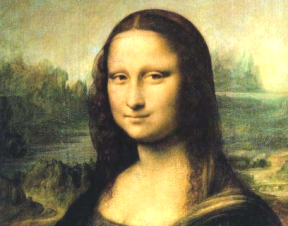

In [45]:
#traitement
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        if valeur>0 :
            r2 = min(r1+valeur,255)
            v2 = min(v1+valeur,255)
            b2 = min(b1+valeur,255)
        else :
            r2 = max(r1+valeur,0)
            v2 = max(v1+valeur,0)
            b2 = max(b1+valeur,0)
        img2.putpixel((x,y),(r2,v2,b2))

# affichage
img.show()
img2.show()

## Symétrie de l'image

Modifier le code pour que la partie gauche du visage se retrouve à droite, et la partie droite se retrouve à gauche.

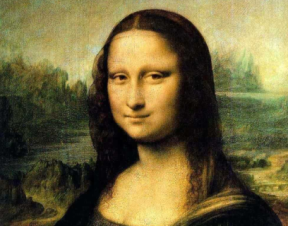

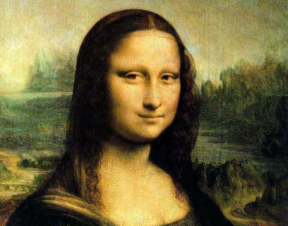

In [49]:
#traitement
for y in range(hauteur): 
    for x in range(largeur):
        r1,v1,b1,a1=img.getpixel((x,y))
        img2.putpixel((largeur-1-x,y),(r1,v1,b1))

# affichage
img.show()
img2.show()